In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import seaborn as sns

import phik
from phik.report import plot_correlation_matrix
from phik import report

import re


from dateutil import parser



Заранеее просмотрел все таблицы я заметил, что все они обладают одинаковыми колонками, но наполненность у них заставляет задуматься.
После объединения неообходимо поработать над пропусками и возможными заменами категориальных данных для дальнейшего анализа.

In [2]:
df1 = pd.read_excel('1-100.xlsx')
df2 = pd.read_excel('101-200.xlsx')
df3 = pd.read_excel('201-300.xlsx')
df4 = pd.read_excel('301-400.xlsx')
df5 = pd.read_excel('401-500.xlsx')
df6 = pd.read_excel('501-600.xlsx')
df7 = pd.read_excel('601-700.xlsx')
df8 = pd.read_excel('701-800.xlsx')
df9 = pd.read_excel('801-900.xlsx')
df10 = pd.read_excel('901-1000.xlsx')


In [3]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
df = pd.concat(frames, ignore_index=True)

In [4]:
df.head(3)

,URL,Название из источника,Количество из источника,Стоимость из источника,Заплачено,Магазин,Город,Код детали,Описание,Производитель,Инфо о доставке,Деталь оригинальная,Цена магазина,Цена за то же количество в магазине,Всего заплачено,Возможное снижение %,Возможная экономия
0,https://www.avtoto.ru/?s=0415238010#page:shop....,0415238010,1,100,100,autoto.ru,Москва,0415238010,"ELEMENT KIT,OIL",TOYOTA,38 дн,да,1260,1260,100,-1160.0,1160
1,https://www.avtoto.ru/?s=0415238010#page:shop....,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильтр масляный,TOYOTA,2 дн,да,1280,1280,100,-1180.0,1180
2,https://www.avtoto.ru/?s=0415238010#page:shop....,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильтp масляный,TOYOTA,5 дн,да,1285,1285,100,-1185.0,1185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214574 entries, 0 to 214573
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   URL                                  214574 non-null  object 
 1   Название из источника                214574 non-null  object 
 2   Количество из источника              214574 non-null  int64  
 3   Стоимость из источника               214574 non-null  int64  
 4   Заплачено                            214574 non-null  int64  
 5   Магазин                              214574 non-null  object 
 6   Город                                214574 non-null  object 
 7   Код детали                           214574 non-null  object 
 8   Описание                             200989 non-null  object 
 9   Производитель                        214572 non-null  object 
 10  Инфо о доставке                      214031 non-null  object 
 11  Деталь оригин

Док-во того, что у Магазина "exist.ru" компания совершала наименьшее кол-во покупок.

In [6]:
len(df[df['Магазин'] == 'exist.ru'])

2691

In [7]:
# Пропуски в данных
df.isna().sum().sort_values(ascending=False)

Описание                               13585
Деталь оригинальная                      543
Инфо о доставке                          543
Производитель                              2
Возможное снижение %                       0
Всего заплачено                            0
Цена за то же количество в магазине        0
Цена магазина                              0
URL                                        0
Название из источника                      0
Код детали                                 0
Город                                      0
Магазин                                    0
Заплачено                                  0
Стоимость из источника                     0
Количество из источника                    0
Возможная экономия                         0
dtype: int64

- В столбцах "Производитель" и "Описание" заменим в пропусках данные на no_info.

- В столбце "Деталь оригинальная" заменим на 0 и 1, а пропуски на 2.

- В столбце "Инфо о доставке" заменим значения на количественные и пропуски заменим наибольшим значением.

In [8]:
filtered_df = df[df['Производитель'].isna()]

filtered_df

,URL,Название из источника,Количество из источника,Стоимость из источника,Заплачено,Магазин,Город,Код детали,Описание,Производитель,Инфо о доставке,Деталь оригинальная,Цена магазина,Цена за то же количество в магазине,Всего заплачено,Возможное снижение %,Возможная экономия
70588,0,140240,1,100,100,autoall.ru,Москва,2170-8404413,Брызговик ВАЗ-2170 задний левый,NaN,NaN,NaN,70,70,100,30.0,-30
158381,0,30/20/2,1,100,100,autoall.ru,Новосибирск,258024-П29,Шплинт 2.5х16,NaN,NaN,NaN,1,1,100,99.0,-99


In [9]:
df['Производитель'] = df['Производитель'].fillna('no_info')
df['Описание'] = df['Описание'].fillna('no_info')

In [10]:

df['Деталь оригинальная'] = df['Деталь оригинальная'].replace('нет','0').replace('да','1').fillna(2).astype(int)


In [11]:
unique_manufacturers = df['Инфо о доставке'].unique()
uni = pd.DataFrame(unique_manufacturers)
print(f'Кол-во уникальных значений в столбе "Инфо о доставке": {len(uni)}')

Кол-во уникальных значений в столбе "Инфо о доставке": 189


# Изменяем категориальные значения даты на количественные

In [12]:
def convert_days(value):
    if isinstance(value, str) and re.match(r'\d+[\s\.]?дн', value):
        return int(re.search(r'\d+', value).group())  # Извлекаем число из строки
    else:
        return None


    
def convert_hours(value):
    if isinstance(value, str) and re.match(r'\d+[\s\.]?ч', value):
        return int(re.search(r'\d+', value).group()) / 24  # Преобразование часов в дни
    else:
        return None
    
def convert_date_with_time(value):
    if isinstance(value, str) and (re.match(r"\d{2}\.\d{2}\s\d{2}:\d{2}", value)):
    # Преобразование строки в объект даты
        date_object = pd.to_datetime(value, format='%d.%m %H:%M')
        
        # print(date_object)
        # Начало года для этой даты
        start_of_year = pd.Timestamp(year=date_object.year, month=1, day=1)

        # Вычисление разницы в днях
        days_since_start_of_year = (date_object - start_of_year).days

        # Преобразование времени в часы и добавление к количеству дней
        hours_since_start_of_day = date_object.hour + date_object.minute / 60
        total_days = days_since_start_of_year + hours_since_start_of_day / 24

        # print("Количество дней с начала года с учетом времени:", total_days)
        return total_days
    



def convert_date(value):
    # Словарь для соответствия дней недели и количеству дней
    day_mapping = {
        'Пн': 0, 'Вт': 1, 'Ср': 2, 'Чт': 3, 'Пт': 4, 'Сб': 5, 'Вс': 6
    }
    
    # Попытка распарсить значение как дату и время
    try:
        parsed_date = parser.parse(value, dayfirst=True)
        return parsed_date
    except:
        # Если не удалось распарсить, попытка преобразовать по формату 'День ЧЧ:ММ'
        try:
            day, time = value.split(' ')
            hour, minute = map(int, time.split(':'))
            # Добавление смещения в дни в зависимости от дня недели
            if day in day_mapping:
                day_offset = day_mapping[day]
                # Преобразование часов и минут в дни
                hour_offset = hour / 24
                minute_offset = minute / (24 * 60)
                return day_offset + hour_offset + minute_offset
        except:
            return None
        
def convert_today(value):
    if 'Сегодня' in value:
        return 0
    elif 'Завтра' in value:
        return 1
    elif 'В ДРУГИХ МАГАЗИНАХ' in value:
        return 183
    else:
        return None


df['Инфо о доставке'] = df['Инфо о доставке'].fillna('No-value')
df['Дни доставки'] = df['Инфо о доставке'].apply(convert_days)
df['Дни доставки'] = df['Дни доставки'].fillna(df['Инфо о доставке'].apply(convert_hours))

df['Дни доставки'] = df['Дни доставки'].fillna(df['Инфо о доставке'].apply(convert_date_with_time))

df['Дни доставки'] = df['Дни доставки'].fillna(df['Инфо о доставке'].apply(convert_date))
df['Дни доставки'] = df['Дни доставки'].fillna(df['Инфо о доставке'].apply(convert_today))
df['Дни доставки'] = df['Дни доставки'].fillna(183) # Заранее проанализировал данные столбца и понял, что максимальное значение равно 182, поэтому поставил значение, которое будет выше 182 -> 183

In [13]:
filtered_df = df[df['Дни доставки'].isna()]

filtered_df

,URL,Название из источника,Количество из источника,Стоимость из источника,Заплачено,Магазин,Город,Код детали,Описание,Производитель,Инфо о доставке,Деталь оригинальная,Цена магазина,Цена за то же количество в магазине,Всего заплачено,Возможное снижение %,Возможная экономия,Дни доставки


In [14]:
filtered_df = df[df['Дни доставки'].isna()]
unique_values = filtered_df['Инфо о доставке'].unique()
print(unique_values)


[]


In [15]:
uni = pd.DataFrame(unique_manufacturers)
for i in range(180, len(uni) ):
    print(uni.iloc[i, 0])

27 дн
12ч
18.03 17:00
21.03 17:00
29.03 12:00
Завтра 15:00
25.03 17:00
01.04 17:00
11ч


In [16]:
max_delivery_days = df['Дни доставки'].max()
print("Максимальное количество дней доставки:", max_delivery_days)


Максимальное количество дней доставки: 183.0


In [17]:
filtered_df = df[df['Дни доставки'].isna()]

filtered_df

,URL,Название из источника,Количество из источника,Стоимость из источника,Заплачено,Магазин,Город,Код детали,Описание,Производитель,Инфо о доставке,Деталь оригинальная,Цена магазина,Цена за то же количество в магазине,Всего заплачено,Возможное снижение %,Возможная экономия,Дни доставки


In [18]:
df.head()

,URL,Название из источника,Количество из источника,Стоимость из источника,Заплачено,Магазин,Город,Код детали,Описание,Производитель,Инфо о доставке,Деталь оригинальная,Цена магазина,Цена за то же количество в магазине,Всего заплачено,Возможное снижение %,Возможная экономия,Дни доставки
0,https://www.avtoto.ru/?s=0415238010#page:shop....,0415238010,1,100,100,autoto.ru,Москва,0415238010,"ELEMENT KIT,OIL",TOYOTA,38 дн,1,1260,1260,100,-1160.0,1160,38.0
1,https://www.avtoto.ru/?s=0415238010#page:shop....,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильтр масляный,TOYOTA,2 дн,1,1280,1280,100,-1180.0,1180,2.0
2,https://www.avtoto.ru/?s=0415238010#page:shop....,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильтp масляный,TOYOTA,5 дн,1,1285,1285,100,-1185.0,1185,5.0
3,https://www.avtoto.ru/?s=0415238010#page:shop....,0415238010,1,100,100,autoto.ru,Москва,0415238010,Автодеталь,TOYOTA,45 дн,1,1305,1305,100,-1205.0,1205,45.0
4,https://www.avtoto.ru/?s=0415238010#page:shop....,0415238010,1,100,100,autoto.ru,Москва,0415238010,"ELEMENT KIT, OIL FILTER",TOYOTA,11 дн,1,1305,1305,100,-1205.0,1205,11.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214574 entries, 0 to 214573
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   URL                                  214574 non-null  object 
 1   Название из источника                214574 non-null  object 
 2   Количество из источника              214574 non-null  int64  
 3   Стоимость из источника               214574 non-null  int64  
 4   Заплачено                            214574 non-null  int64  
 5   Магазин                              214574 non-null  object 
 6   Город                                214574 non-null  object 
 7   Код детали                           214574 non-null  object 
 8   Описание                             214574 non-null  object 
 9   Производитель                        214574 non-null  object 
 10  Инфо о доставке                      214574 non-null  object 
 11  Деталь оригин

<Axes: >

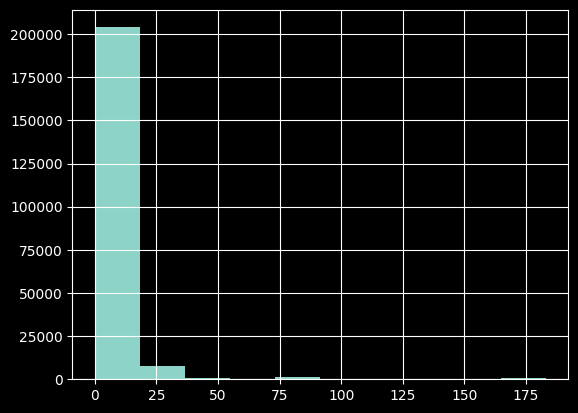

In [20]:
df['Дни доставки'].hist()

Сейчас можем заметить, что большая часть данных 93% приходится на первую половину месяца, поэтому можем смело отсечь выбросы, которые могут повлиять на дальнейший анализ данных.

In [21]:
# Определение границ интервалов
bins = [-np.inf, 3.0, 7.0, 9.0, 12.0, np.inf]

# Собственные названия интервалов
labels = ['От 0 до 3 дней', 'От 3 до 7 дней', 'От 7 до 9 дней', 'От 9 до 12 дней', 'От 12 дней и выше']

# Применение pd.cut() с собственными названиями интервалов
df['Дни доставки интервалы'] = pd.cut(df['Дни доставки'], bins=bins, labels=labels)


# df['Дни доставки интервалы'] = pd.cut(df['Дни доставки'],5)

In [22]:
df['Дни доставки интервалы'].value_counts()

Дни доставки интервалы
От 0 до 3 дней       108185
От 3 до 7 дней        69001
От 12 дней и выше     17171
От 7 до 9 дней        12334
От 9 до 12 дней        7883
Name: count, dtype: int64

In [23]:
df = df[df['Дни доставки'].between(-0.183, 16.0)]


In [24]:
df['Дни доставки интервалы'].value_counts()

Дни доставки интервалы
От 0 до 3 дней       108185
От 3 до 7 дней        69001
От 7 до 9 дней        12334
От 9 до 12 дней        7883
От 12 дней и выше      4824
Name: count, dtype: int64

In [25]:
# Определение границ интервалов
bins = [-np.inf, 3.0, 7.0, 9.0, 12.0, np.inf]

# Собственные названия интервалов
labels = ['От 0 до 3 дней', 'От 3 до 7 дней', 'От 7 до 9 дней', 'От 9 до 12 дней', 'От 12 дней и выше']

# Применение pd.cut() с собственными названиями интервалов
df['Дни доставки интервалы'] = pd.cut(df['Дни доставки'], bins=bins, labels=labels)


# df['Дни доставки интервалы'] = pd.cut(df['Дни доставки'],5)

In [26]:
df['Дни доставки интервалы'].value_counts()


Дни доставки интервалы
От 0 до 3 дней       108185
От 3 до 7 дней        69001
От 7 до 9 дней        12334
От 9 до 12 дней        7883
От 12 дней и выше      4824
Name: count, dtype: int64

<Axes: >

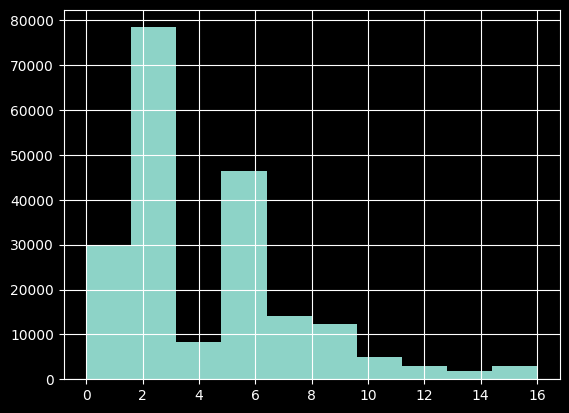

In [27]:
df['Дни доставки'].hist()

In [28]:
df['Город'].value_counts()

Город
Москва         123336
Новосибирск     78891
Name: count, dtype: int64

In [29]:
indices_to_drop = df[df['Производитель'] == 'no_info'].index
df.drop(indices_to_drop, inplace=True)
indices_to_drop = df[df['Описание'] == 'no_info'].index
df.drop(indices_to_drop, inplace=True)
df = df.drop('URL',axis = 1) # Лишние данные для анализа



# Начала анализа цен

В первой половине мы будем учитывать цены без усечения данных, но во второй половине протестируем наши данные с усечением на 5 и 95 процентилях.

In [30]:
df.head(3)

,Название из источника,Количество из источника,Стоимость из источника,Заплачено,Магазин,Город,Код детали,Описание,Производитель,Инфо о доставке,Деталь оригинальная,Цена магазина,Цена за то же количество в магазине,Всего заплачено,Возможное снижение %,Возможная экономия,Дни доставки,Дни доставки интервалы
1,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильтр масляный,TOYOTA,2 дн,1,1280,1280,100,-1180.0,1180,2.0,От 0 до 3 дней
2,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильтp масляный,TOYOTA,5 дн,1,1285,1285,100,-1185.0,1185,5.0,От 3 до 7 дней
4,0415238010,1,100,100,autoto.ru,Москва,0415238010,"ELEMENT KIT, OIL FILTER",TOYOTA,11 дн,1,1305,1305,100,-1205.0,1205,11.0,От 9 до 12 дней


Столбики 'Стоимость из источника', 'Заплачено', 'Всего Заплачено' по моим предположениям являются % значением того, что полностью ли купили товара или нет. Также с ними линейно связан столбик 'Стоимость из источника	Заплачено'. 

In [31]:
df['Магазин'].value_counts()

Магазин
autoto.ru    188115
exist.ru       1855
Name: count, dtype: int64

In [32]:
df['Всего заплачено'].value_counts()

Всего заплачено
100    167339
200     22631
Name: count, dtype: int64

In [33]:
print((df['Цена магазина'] == df['Цена за то же количество в магазине']).mean())
print((df['Цена магазина'] == df['Цена за то же количество в магазине']).sum())
print((df['Цена магазина'] == df['Цена за то же количество в магазине']).count())



0.8808706637890193
167339
189970


<Axes: >

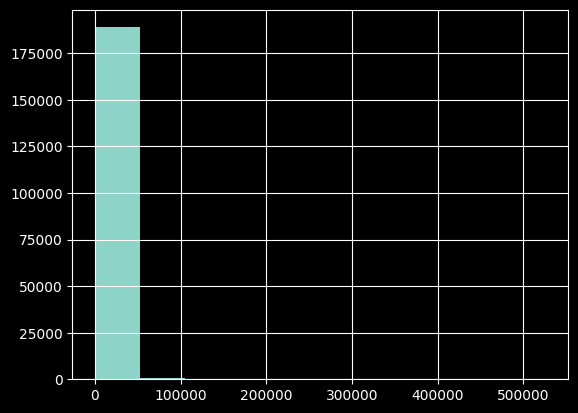

In [34]:
df['Цена за то же количество в магазине'].hist()

##  Подтверждение теории о связи столбцов, что писал выше.

interval columns not set, guessing: ['Количество из источника', 'Стоимость из источника', 'Заплачено', 'Деталь оригинальная', 'Цена магазина', 'Цена за то же количество в магазине', 'Всего заплачено', 'Возможное снижение %', 'Возможная экономия', 'Дни доставки']


d:\Programs\Python\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable Стоимость из источника for analysis 1. Dropping this column
  warnings.warn(


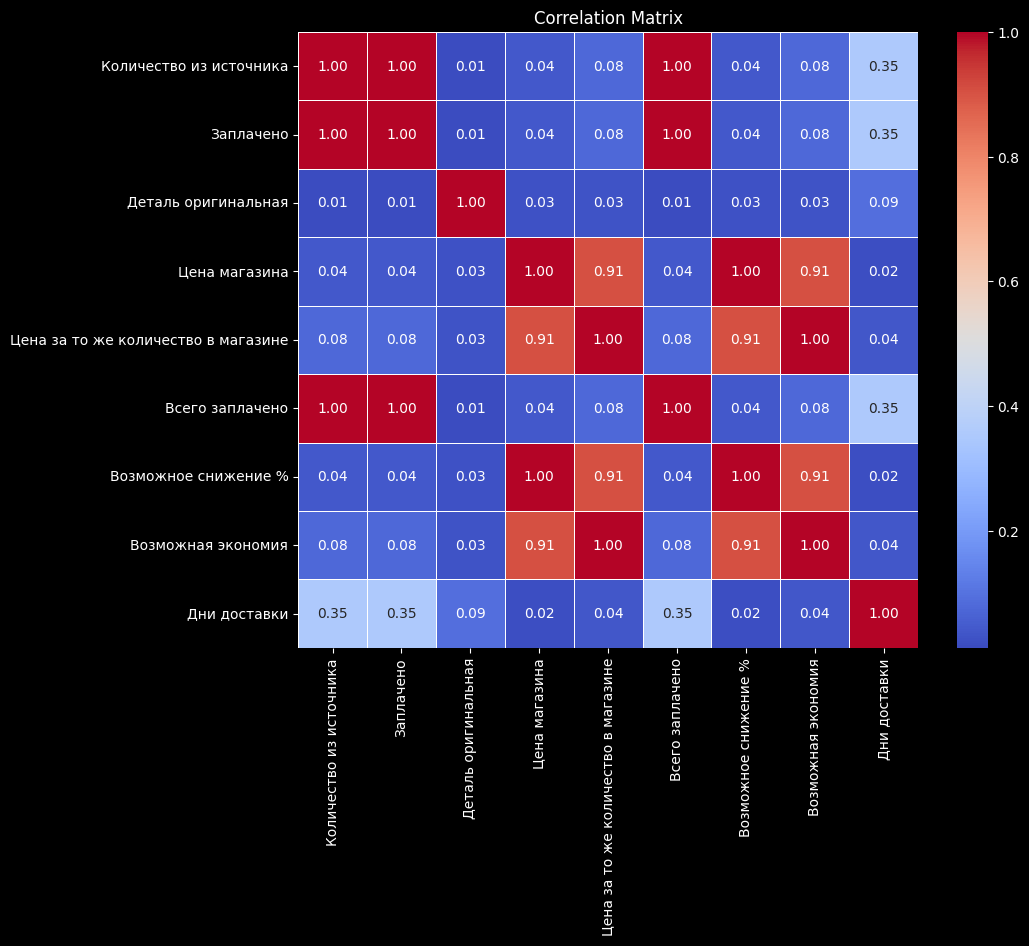

In [35]:
numeric_columns = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

phik_overview = numeric_columns.phik_matrix()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(phik_overview, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

По тенденции ниже мы можем заметить, что детали были получены бесплатно и в основе предположить, что exist.ru это аналог вторичного рынка, на котором можно за "бесплтано" получить необходимую нам деталь.

In [36]:
df[df['Цена магазина'] == df['Цена магазина'].min()].head(3)

,Название из источника,Количество из источника,Стоимость из источника,Заплачено,Магазин,Город,Код детали,Описание,Производитель,Инфо о доставке,Деталь оригинальная,Цена магазина,Цена за то же количество в магазине,Всего заплачено,Возможное снижение %,Возможная экономия,Дни доставки,Дни доставки интервалы
6993,1546747,1,100,100,exist.ru,Москва,715 521 7042,Диск тормозной передний вентилируемый,Meyle,Ср 15:30,0,0,0,100,100.0,-100,2.645833,От 0 до 3 дней
6994,1546747,1,100,100,exist.ru,Москва,FT......15,Диск тормозной передний вентилируемый,Fast,Ср 13:00,0,0,0,100,100.0,-100,2.541667,От 0 до 3 дней
6995,1546747,1,100,100,exist.ru,Москва,PB......17,Диск тормозной передний вентилируемый,Patron,Завтра 12:30,0,0,0,100,100.0,-100,1.000000,От 0 до 3 дней


In [37]:
df[df['Цена магазина'] == 15].head(2)

,Название из источника,Количество из источника,Стоимость из источника,Заплачено,Магазин,Город,Код детали,Описание,Производитель,Инфо о доставке,Деталь оригинальная,Цена магазина,Цена за то же количество в магазине,Всего заплачено,Возможное снижение %,Возможная экономия,Дни доставки,Дни доставки интервалы
12441,1745686,1,100,100,autoto.ru,Москва,MM2,Шайба медная Ф7x14x2мм,AUTO-GUR,2 дн,0,15,15,100,85.0,-85,2.0,От 0 до 3 дней
12442,1745686,1,100,100,autoto.ru,Москва,MM2,Кольцо уплотнительное,AUTO-GUR,36ч,0,15,15,100,85.0,-85,1.5,От 0 до 3 дней


В дальнейшем нужно будет анализировать оба магазина в отдельности для поимания общей стратегии продажи автозапчастей для определения собственной выгоды.

In [38]:
# Группировка данных по срокам доставки и вычисление средней цены
t = df.groupby(['Магазин','Деталь оригинальная','Дни доставки интервалы'], observed=True)['Цена магазина'].agg(['count','mean','median'])
t.columns = [''.join(col).strip() for col in t.columns.values]
t = t.reset_index()
t


,Магазин,Деталь оригинальная,Дни доставки интервалы,count,mean,median
0,autoto.ru,0,От 0 до 3 дней,81367,2929.416901,1115.0
1,autoto.ru,0,От 3 до 7 дней,54807,3409.979838,1415.0
2,autoto.ru,0,От 7 до 9 дней,8852,3139.483732,1415.0
3,autoto.ru,0,От 9 до 12 дней,5866,3490.226730,925.0
4,autoto.ru,0,От 12 дней и выше,3472,3884.344758,1462.5
5,autoto.ru,1,От 0 до 3 дней,17557,5003.838070,2205.0
6,autoto.ru,1,От 3 до 7 дней,11073,5945.728800,2835.0
7,autoto.ru,1,От 7 до 9 дней,2361,5996.505718,3010.0
8,autoto.ru,1,От 9 до 12 дней,1557,6187.562620,2020.0
9,autoto.ru,1,От 12 дней и выше,1203,6967.955112,3470.0


In [39]:
q1 = df['Цена магазина'].quantile(0.05)
q2 = df['Цена магазина'].quantile(0.95)

<Axes: >

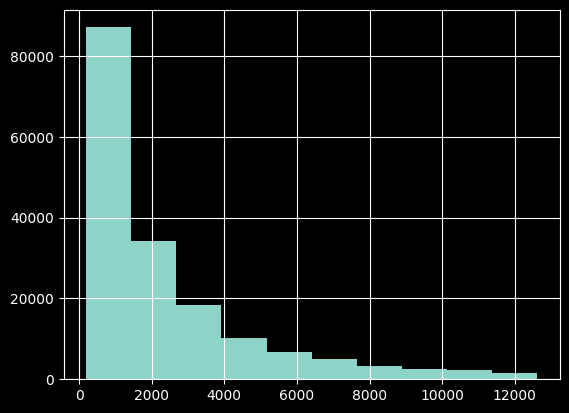

In [40]:
df[df['Цена магазина'].between(q1,q2)]['Цена магазина'].hist()

# Классификация автозапчастей

Кластеризация не дала должной точности(10%), поэтому работу пришлось проделать ручным путем.


In [41]:
def classify_description(description):
    keywords = {
        ('фильтp масляный', 'фильтр масляный', 'фильт масляный','filter','фильтр маслянный','фильтры','масляный фильтр','фильтр масл.',
         'фильтр маслянный','фильтры','фильтр','ф-р','MANN HU','масля','OX413D1','OX 413D1','КОМП. МАСЛ.ФИЛ.','PSA Berlingo','ФИЛЬТP ВОЗДУШНЫЙ','Фильтр',
         'FILS','SAKURAA1952','ФИЛ.','EMIS','MANN','РРРССС','JS ASAKASHIAC108C','SUBARU Trezia 11','FO-E','TOTACHI','FILTRONOE6883'
         ): 'Фильтр',

         ('Вставка масляная','Вставкамасляная'):'Вставка масляная',

         ('Автодеталь','деталь'):'Деталь',
         	
        ('опора амортизатора','Опора заднего амортизатора','ОПОРА АМОРТИЗАТОРA','Опора амортизаторa','Опора задн.амортизатора','Опора',
        'Опора амортизационной стойки','стойки амортизатора','Опора аморт','Шаровая','шаровая','Шаровые','Шаро'):'Опора',

        ('Очиститель'):'Очиститель',

        ('Масло','ENGINE OIL','Toyota 5W40 SМCF','Patron Original PI 5W40 C3','Patron Original','Synthetic','EDGE PROFESSIONAL','MAGNATEC'
         ) : 'Масло',

        ('АНТИФРИЗ','Жидкость','концентрат EU','концентрат','Octafluid G12 Red','Octafluid','GREENCOOL','PATRONPCF2005',
         'PATRON','KYK SUPER','V172485620','FORD1890260') :'Антифриз',

        ('Технические очистители'):'Очистители',
        ('Болт') :'Болт',
        ('Прокладка','прокл','прок','Пpокладка','MANSCHETTEN','USZCZELKA POKRYWY','305 092') : 'Прокладка',
        ('Кольцо уплотнительное','Кольцо'):'Кольцо',
        ('Колодки','КОЛОДКИ','колодки','Колодка','Колод','КОЛ.'):'Колодки',
        ('Втулка','ВТ','LYNXauto'):'Втулка',
        ('Сальник','CAЛЬHИKПOЛУOCИЗAДHEГOMOCTA','19036447B','Cальник'):'Сальник',
        ('Уплотнение','мск'):'Уплотнение',
        ('Направ','напр','Наравл'):'Направляющая',
        ('Ремк','Рк','РК','Рем','КОМПЛЕКТ','комплект'):'Ремкомплект',
        ('РЫЧАГ'):'Рычаг',
        ('запчасть','АВТОЗЧ'):'Автозапчасть',
        ('Шарнир','шарнир','JOINT'):'Шарнир',
        ('САЙЛЕНТБЛОК','САЙЛЕНБЛОК','Сблок','Р Р РР Р Р С Р Р Р Р Р Р Р Р'):'Сайлентблок',
        ('рессоры'):'Рессоры',
        ('Диск','F1033P','Transit','Disk'):'Диск',
        ('шланг'):'Шланг',
        ('ШТИФТЫ'):'Штифты',
        ('ДАТЧИК','датчик','дат','Индикатор','ИЗНОСА'):'Датчик/Индикатор',
        ('Подшипник','Подшипники','подшипники','Подшип'):'Подшипник',
        ('лампа','Лампо','Патрон','Разъем лампы','Лампы'):'Лампа',
        ('Ролик','ГРМ','Pолик'):'Ролик',
        ('Механизм'):'Механизм',
        ('Трос'):'Трос',
        ('Крышка','ПЕРЕДНЯЯ'):'Крышка',
        ('Кожух','Кожуг'):'Кожух',
        ('Корпус'):'Корпус',
        ('Свеча','Свеч'):'Свеча',
        ('НАКЛАД'):'Накладка',
        ('Наконечник','KoЕcГwka','Рулевой'):'Наконечник',
        ('Шкив'):'Шкив',
        ('Отбойник'):'Отбойник',
        ('Экран'):'Экран',
        ('Тяга'):'Тяга',
        ('ШАЙБА'):'Шайба',
        ('Уплотнитель','Уплот','ACQ','FORD','УПЛ'):'Уплотнитель',
        ('Держатель'):'Держатель',
        ('РАДИАТОР'):'Радиатор',
        ('Теплообменник'):'Теплообменник',
        ('Охладитель'):'Охладитель',
        ('Цепь','цепи'):'Цепь',
        ('Колп'):'Колпачок',
        ('Щетка','Щетк'):'Щетка',
        ('ПРИВОД'):'Привод',
        ('Исполнительный элемент','исполнительный'):'Исполнительный элемент',
        ('Регулировочный элемент'):'Регулировочный элемент',
        ('Элемент крепления'):'Элемент крепления',
        ('Лючок','лючка'):'Лючок',
        ('ШПИЛЬК'):'Шпилька',
        ('Палец'):'Палец',
        ('Подушка'):'Подушка',
        ('Стопор'):'Стопор',
        ('Средсво для очистки','очистит'):'Средсво для очистки',
        ('Замок'):'Замок',

        ('Брелок-ключница','Материал','ПАРАЗИТНЫЙ ВЕДУЩИЙ','Водяной','Корзина сцепления','Р Р С Р','РРРРРС'
         ,'NONAME','ПАРАЗИТНЫЙ ВЕДУЩИЙ','ИЗОЛЯТОР'):'Мелочи',



        ('Гайка','гайк','ШЕСТИ'):'Гайка',
        ('СТОЙКА','CTOЙKAЗAДHEГOCTAБИЛИЗATOPA','стойка','CТOЙКA'):'Стойка',
        ('Линк передний','Линк'):'Линк',
        ('Стабилизатор','Р С Р Р С С Р Р Р Р Р Р Р С Р С Р'):'Стабилизатор',
        ('Детали'):'Детали',
        ('Топливный бак'):'Бак',
        ('Пробка'):'Пробка',
        ('Герметик'):'Герметик',
        ('Фара'):'Фара',
        ('АКБ','Аккумулятор','ATEX Classic','GM SILVER ATST 95--R 850A','EXIDE Premium','Centra'
         'BOSCH S','BOSCH S5','BOSCH S4','EАКК БАТ L5 STT','E АКК','EАКК','EXIDE','Centra Futura','ATST'
         'VARTA Blue','VARTA Blue Dynamic R','ATST','Crafter','Contitech'):'Аккумулятор',
         ('Маховик'):'Маховик',
         ('Насос'):'Насос',
         ('помпа'):'Помпа',
         ('Pемень'):'Pемень'

    }
    description_lower = description.lower()
    for keyword, classification in keywords.items():
        if isinstance(keyword, tuple):
            for k in keyword:
                if k.lower() in description_lower:
                    return classification
        else:
            if keyword.lower() in description_lower:
                return classification
    
    return 'Другое'


df['Классификация'] = df['Описание'].apply(classify_description)


In [42]:
df['Описание'].value_counts().head()

Описание
Фильтр воздушный    3643
Фильтр масляный     2686
Автодеталь          2548
Фильтр топливный    2071
Фильтр салона       1808
Name: count, dtype: int64

In [43]:
df['Классификация'].value_counts().head()

Классификация
Фильтр         48872
Колодки        28206
Другое         13913
Ремкомплект    12643
Диск           11111
Name: count, dtype: int64

Оставшаяся часть данных находилась в необрабатываемом формате, что даже ML не смогла бы дать нужные метки, кроме как индификатор - 'Другое'.
Прекрасно понимаю, что для анализа эти данные будут важны, но в данном случае я не могу себе позволить обработать все значения и предпочту продолжить анализировать датасет.

In [44]:
indices_to_drop = df[df['Классификация'] == 'Другое'].index
df.drop(indices_to_drop, inplace=True)


In [45]:
df.head()

,Название из источника,Количество из источника,Стоимость из источника,Заплачено,Магазин,Город,Код детали,Описание,Производитель,Инфо о доставке,Деталь оригинальная,Цена магазина,Цена за то же количество в магазине,Всего заплачено,Возможное снижение %,Возможная экономия,Дни доставки,Дни доставки интервалы,Классификация
1,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильтр масляный,TOYOTA,2 дн,1,1280,1280,100,-1180.0,1180,2.0,От 0 до 3 дней,Фильтр
2,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильтp масляный,TOYOTA,5 дн,1,1285,1285,100,-1185.0,1185,5.0,От 3 до 7 дней,Фильтр
4,0415238010,1,100,100,autoto.ru,Москва,0415238010,"ELEMENT KIT, OIL FILTER",TOYOTA,11 дн,1,1305,1305,100,-1205.0,1205,11.0,От 9 до 12 дней,Фильтр
5,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильт масляный,TOYOTA,10 дн,1,1305,1305,100,-1205.0,1205,10.0,От 9 до 12 дней,Фильтр
6,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильт масляный,TOYOTA,10 дн,1,1305,1305,100,-1205.0,1205,10.0,От 9 до 12 дней,Фильтр


## Ниже я хочу изучить ранкинг категорий автозапчастей, которые компания приобретала в наибольшем количестве, а также средние и медианные суммы, которые она вложила в эти категории товаров.

In [46]:
t = df.groupby(['Классификация'])['Цена магазина'].agg(['count','mean','median','min','max'])


t.columns = [''.join(col).strip() for col in t.columns.values]


t = t.reset_index().sort_values(by='count', ascending=False)


t.head(10)


,Классификация,count,mean,median,min,max
63,Фильтр,48872,1448.859592,815.0,0,49715
17,Колодки,28206,3663.010955,2475.0,15,79295
46,Ремкомплект,12643,5369.835245,1800.0,18,179080
13,Диск,11111,5035.114031,2715.0,0,171390
6,Втулка,8493,1832.281761,465.0,0,279875
33,Опора,7121,3660.193091,2720.0,90,52990
3,Антифриз,5549,3642.103082,1630.0,0,106345
59,Тяга,4088,2200.824364,1407.5,200,23140
12,Деталь,3733,4005.641575,1815.0,20,212965
25,Масло,3579,11692.291702,1655.0,20,526175


Можно также заметить, что экстремальные значения (максимумы и минимумы) могут оказать значительное влияние на анализ данных. Для улучшения результатов анализа можно усечь значения за пределами определенного диапазона, что я и сделаю дальше.

# Проверка гипотезы о том, что является ли целесообразным брать неоригинальные запчасти.

In [47]:
t = df.groupby(['Деталь оригинальная','Дни доставки интервалы'], observed=True)['Цена магазина'].agg(['count','mean','median','min','max'])
t.columns = [''.join(col).strip() for col in t.columns.values]


t = t.reset_index().sort_values(by='count', ascending=False)


t.head()


,Деталь оригинальная,Дни доставки интервалы,count,mean,median,min,max
0,0,От 0 до 3 дней,77106,2648.765868,1070.0,0,334310
1,0,От 3 до 7 дней,51720,3022.612181,1340.0,0,526175
5,1,От 0 до 3 дней,15919,4811.945600,2195.0,15,356035
6,1,От 3 до 7 дней,9896,5458.072858,2740.0,0,435515
2,0,От 7 до 9 дней,8207,2840.993664,1370.0,10,298755


Практика показала, что большую часть деталей компания берет из вторичного/(неофициального) рынка, где может сэкономить на покупке и при этом не проиграть в качестве товара.

# Проверим нашу теорию на усеченных данных на 5 и 95 процентиле

In [48]:
# Определение квантилей
q1 = df['Цена магазина'].quantile(0.05)
q2 = df['Цена магазина'].quantile(0.95)


f_df = df.loc[df['Цена магазина'].between(q1, q2)]

In [49]:
t = f_df.groupby(['Магазин','Деталь оригинальная','Дни доставки интервалы'], observed=True)['Цена за то же количество в магазине'].agg(['count','mean','median'])
t.columns = [''.join(col).strip() for col in t.columns.values]
t = t.reset_index()
t

,Магазин,Деталь оригинальная,Дни доставки интервалы,count,mean,median
0,autoto.ru,0,От 0 до 3 дней,68924,2058.724392,1245.0
1,autoto.ru,0,От 3 до 7 дней,46708,2122.895114,1360.0
2,autoto.ru,0,От 7 до 9 дней,7602,2144.578400,1390.0
3,autoto.ru,0,От 9 до 12 дней,4735,2166.677930,1250.0
4,autoto.ru,0,От 12 дней и выше,2929,2340.484807,1500.0
5,autoto.ru,1,От 0 до 3 дней,13869,3482.857812,2310.0
6,autoto.ru,1,От 3 до 7 дней,8551,3643.604257,2565.0
7,autoto.ru,1,От 7 до 9 дней,1794,3819.740803,2665.0
8,autoto.ru,1,От 9 до 12 дней,1213,3589.641385,2300.0
9,autoto.ru,1,От 12 дней и выше,836,3823.385167,2690.0


In [50]:
t = f_df.groupby(['Магазин'], observed=True)['Цена магазина'].agg(['count','mean'])
t.columns = [''.join(col).strip() for col in t.columns.values]
t = t.reset_index()
t

,Магазин,count,mean
0,autoto.ru,157161,2163.220646
1,exist.ru,1388,2374.846542


In [51]:
t = f_df.groupby(['Магазин','Деталь оригинальная'], observed=True)['Цена магазина'].agg(['count','mean','median','min','max'])
t.columns = [''.join(col).strip() for col in t.columns.values]
t = t.reset_index()
t

,Магазин,Деталь оригинальная,count,mean,median,min,max
0,autoto.ru,0,130898,1936.607206,1195.0,205,11190
1,autoto.ru,1,26263,3292.689716,2215.0,205,11190
2,exist.ru,0,1237,2400.443007,1378.0,211,11161
3,exist.ru,1,151,2165.158940,1399.0,208,10100


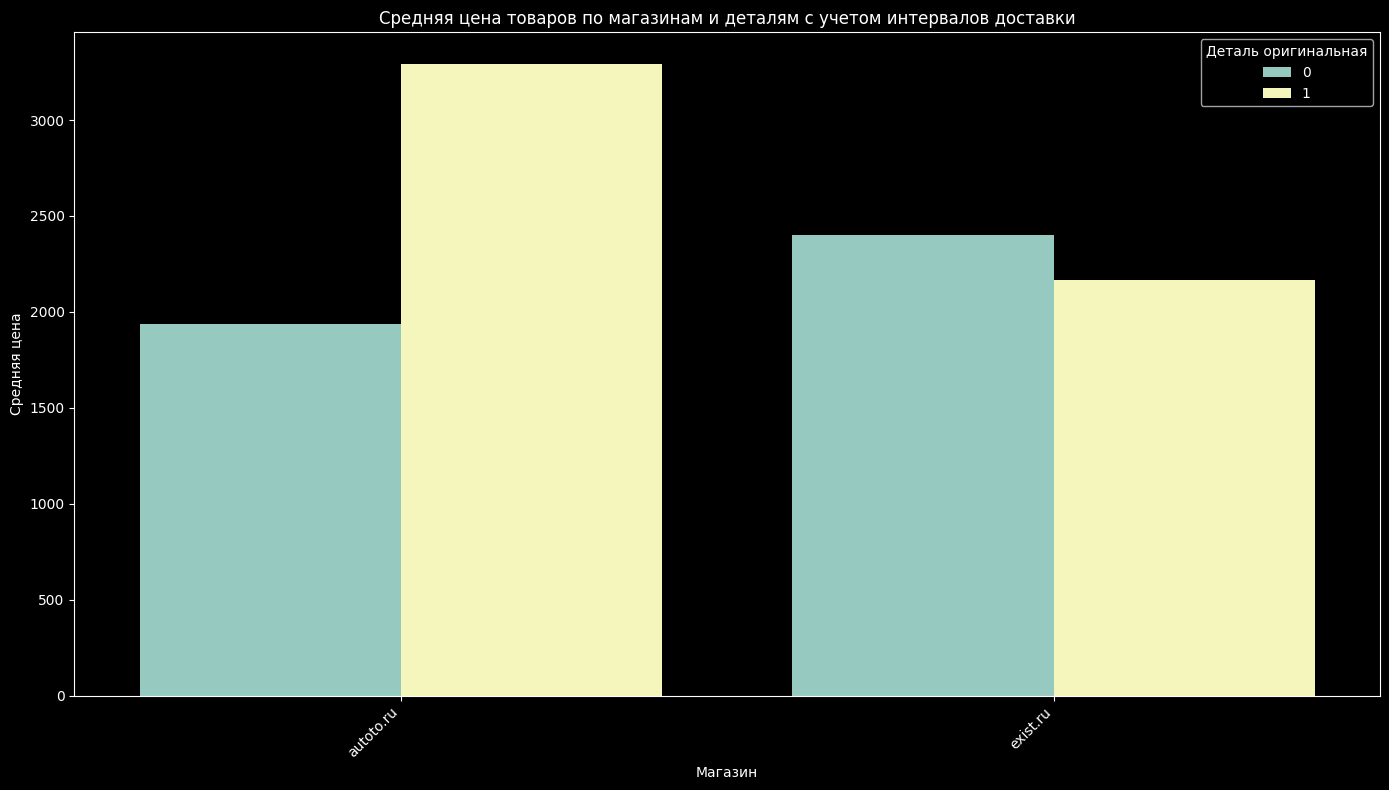

In [52]:

plt.figure(figsize=(14, 8))
sns.barplot(data=t, x='Магазин', y='mean', hue='Деталь оригинальная',errorbar=None)
plt.title('Средняя цена товаров по магазинам и деталям с учетом интервалов доставки')
plt.xlabel('Магазин')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Деталь оригинальная')
plt.tight_layout()
plt.show()

## Ранкинг товаров

In [53]:
t = f_df.groupby(['Классификация'])['Цена магазина'].agg(['count','mean','median','min','max'])


t.columns = [''.join(col).strip() for col in t.columns.values]


t = t.reset_index().sort_values(by='count', ascending=False)


t.head()

,Классификация,count,mean,median,min,max
61,Фильтр,47205,1390.524987,835.0,205,11180
17,Колодки,26229,3167.839186,2420.0,205,11190
44,Ремкомплект,11061,2466.299973,1550.0,205,11185
13,Диск,9807,3121.531151,2355.0,205,11180
32,Опора,6844,3138.111631,2635.0,210,11190


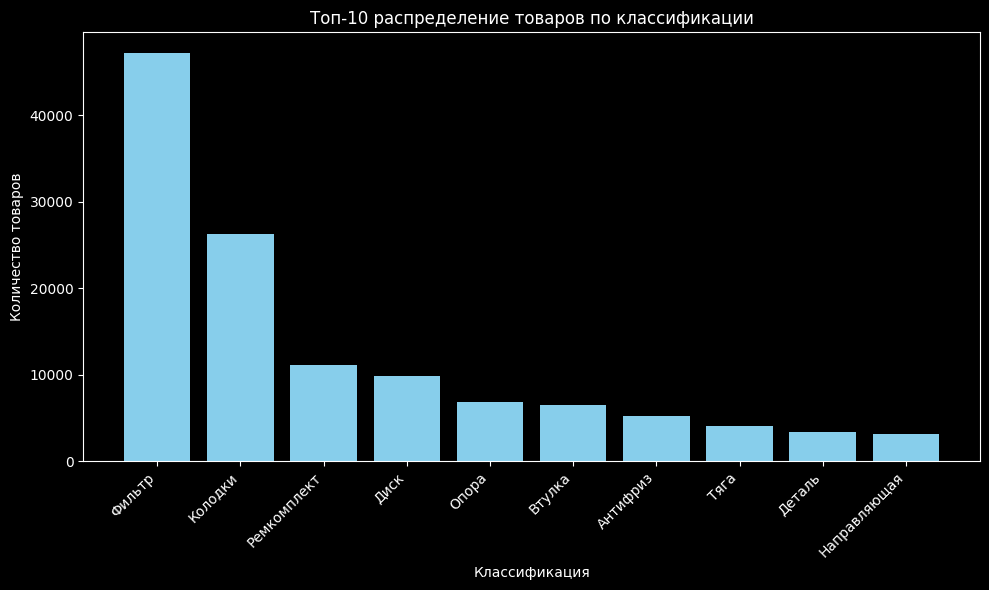

In [54]:

top_10 = t.head(10)


plt.figure(figsize=(10, 6))
plt.bar(top_10['Классификация'], top_10['count'], color='skyblue')
plt.xlabel('Классификация')
plt.ylabel('Количество товаров')
plt.title('Топ-10 распределение товаров по классификации')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


## Ранкинг товаров в каждом магазине.

In [55]:
fil1 = f_df[f_df['Магазин'] =='autoto.ru']
fil2 = f_df[f_df['Магазин'] =='exist.ru']

In [56]:
t1 = fil1.groupby(['Классификация'])['Цена магазина'].agg(['count','mean'])
t1.columns = [''.join(col).strip() for col in t1.columns.values]
t1 = t1.reset_index().sort_values(by='count', ascending=False)
t1.head()

,Классификация,count,mean
61,Фильтр,46943,1388.614703
17,Колодки,26168,3169.226536
44,Ремкомплект,10971,2442.999271
13,Диск,9687,3115.551254
32,Опора,6826,3131.112657


In [57]:
t2 = fil2.groupby(['Классификация'])['Цена магазина'].agg(['count','mean'])
t2.columns = [''.join(col).strip() for col in t2.columns.values]
t2 = t2.reset_index().sort_values(by='count', ascending=False)
t2.head()

,Классификация,count,mean
39,Фильтр,262,1732.793893
7,Диск,120,3604.258333
27,Прокладка,114,1688.885965
1,Антифриз,111,1583.306306
33,Сальник,92,1095.608696


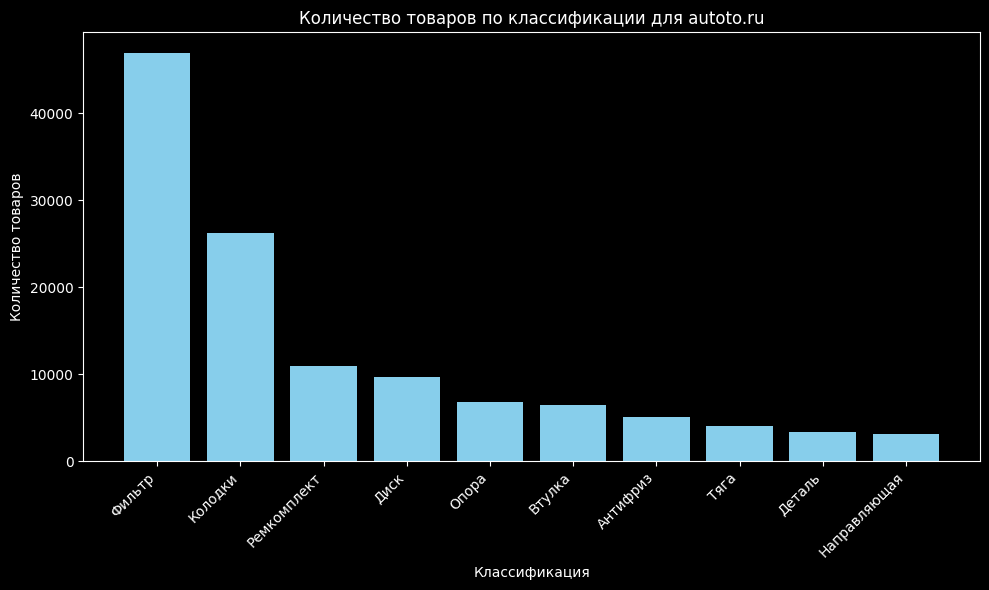

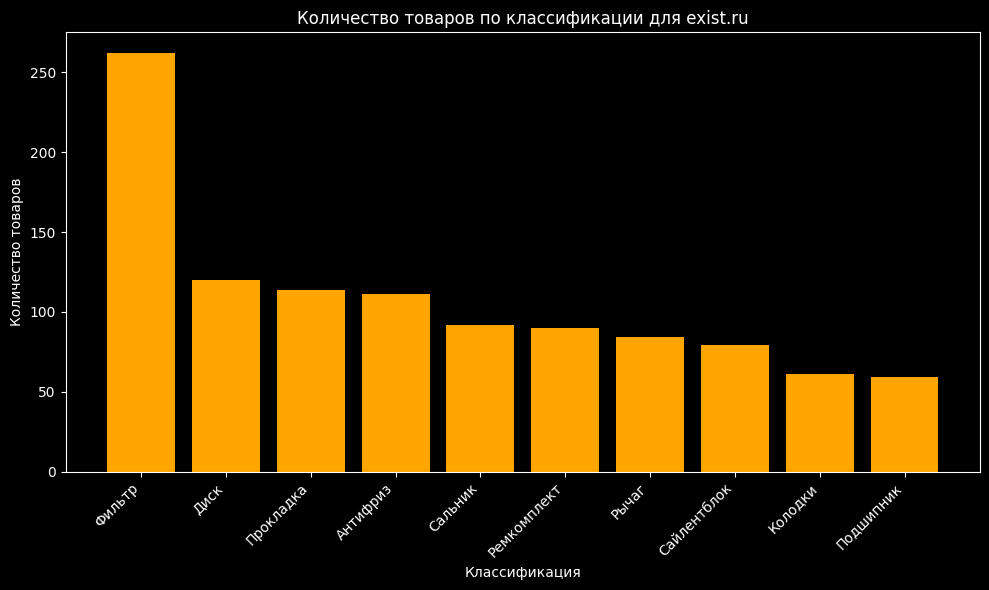

In [58]:

t1 = t1.head(10)
t2 = t2.head(10)


#  Создание первой диаграммы для autoto.ru
plt.figure(figsize=(10, 6))
plt.bar(t1['Классификация'], t1['count'], color='skyblue')
plt.xlabel('Классификация')
plt.ylabel('Количество товаров')
plt.title('Количество товаров по классификации для autoto.ru')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Создание второй диаграммы для exist.ru
plt.figure(figsize=(10, 6))
plt.bar(t2['Классификация'], t2['count'], color='orange')
plt.xlabel('Классификация')
plt.ylabel('Количество товаров')
plt.title('Количество товаров по классификации для exist.ru')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Сравнения кол-ва товаров в двух магазинах

In [59]:
t = f_df.groupby(['Магазин'])['Классификация'].agg(['count'])
t.columns = [''.join(col).strip() for col in t.columns.values]
t = t.reset_index().sort_values(by='count', ascending=False)
t

,Магазин,count
0,autoto.ru,157161
1,exist.ru,1388


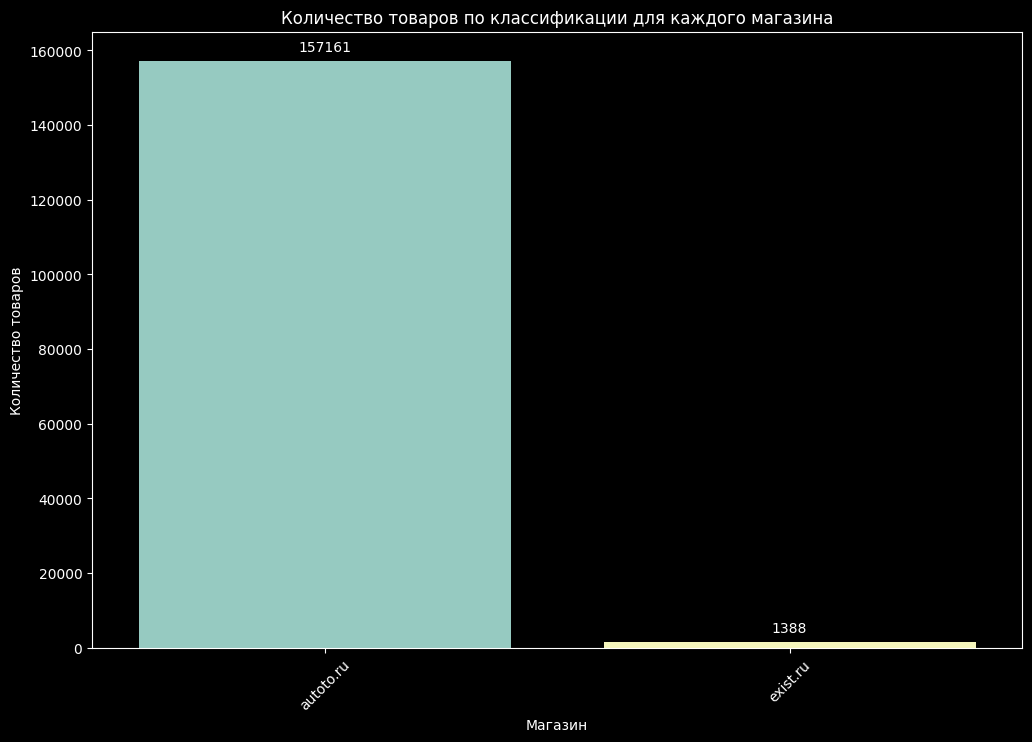

In [60]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=t, x='Магазин', y='count', hue='Магазин')

# Добавление цифр к каждому столбику
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Количество товаров по классификации для каждого магазина')
plt.xlabel('Магазин')
plt.ylabel('Количество товаров')
plt.xticks(rotation=45)  
plt.show()


In [61]:
t = f_df.groupby(['Деталь оригинальная','Дни доставки интервалы'], observed=True)['Цена магазина'].agg(['count','mean','median','min','max'])
t.columns = [''.join(col).strip() for col in t.columns.values]
t = t.reset_index().sort_values(by='count', ascending=False)
t.head()

,Деталь оригинальная,Дни доставки интервалы,count,mean,median,min,max
0,0,От 0 до 3 дней,69361,1837.311818,1115.0,205,11190
1,0,От 3 до 7 дней,47508,2073.460428,1325.0,205,11190
5,1,От 0 до 3 дней,13919,3104.240032,2060.0,205,11190
6,1,От 3 до 7 дней,8652,3491.141586,2395.0,205,11160
2,0,От 7 до 9 дней,7602,2105.318995,1360.0,205,11120


Можно заметить, что значения наши уменьшились, а максимальное и минимальное находятся в пределах нормы и в данном случае нельзя их назвать аномальными и сильно влияющими на среднее и медианное значения, которые я захотел посмотреть.

## Проведем сравнение городов, в которых компания приобретает автозапчасти.

In [62]:
t = f_df.groupby(['Город'], observed=True)['Цена магазина'].agg(['count','mean'])
t.columns = [''.join(col).strip() for col in t.columns.values]


t = t.reset_index().sort_values(by='Город', ascending=True)
t

,Город,count,mean
0,Москва,91768,2010.509557
1,Новосибирск,66781,2377.469130


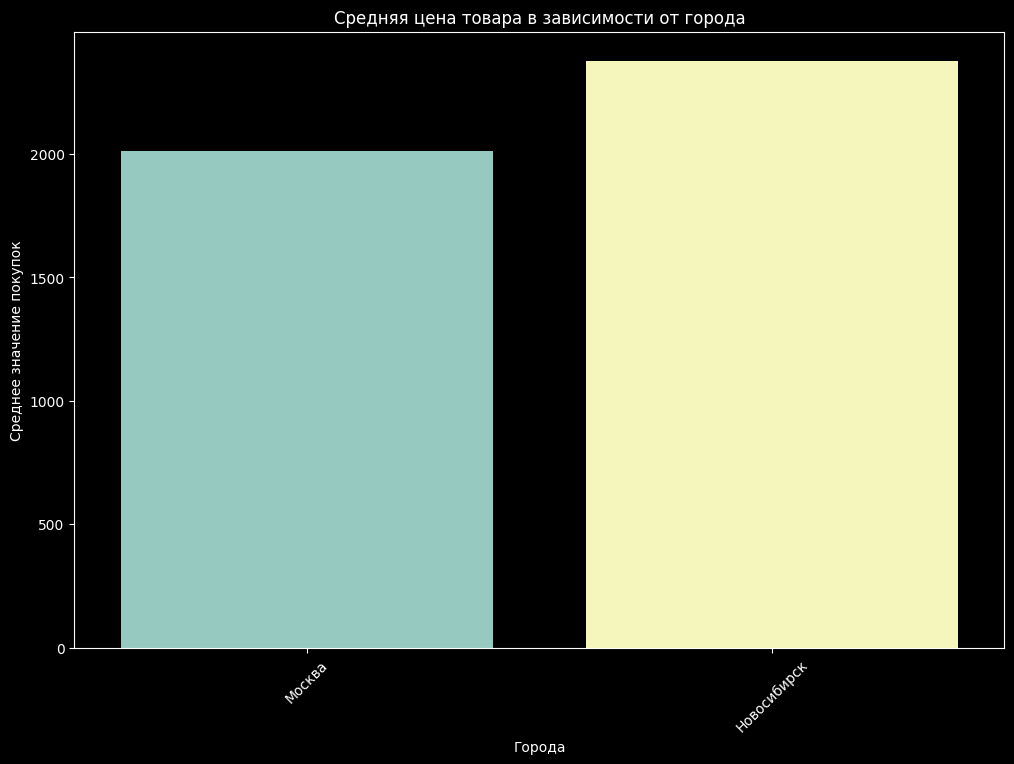

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Город', y='mean', hue='Город', data=t)
plt.title('Средняя цена товара в зависимости от города')
plt.xlabel('Города')
plt.ylabel('Среднее значение покупок')
plt.xticks(rotation=45)
plt.show()

## По данным диаграммам видно, что Средняя цена в Москве ниже, чем в Новосибирске. Также можно посмотреть группировку по интервалам дней доставки для более подробного анализа цен.

In [64]:
t = f_df.groupby(['Город','Дни доставки интервалы'], observed=True)['Цена магазина'].agg(['count','mean','median','min','max'])
t.columns = [''.join(col).strip() for col in t.columns.values]


t = t.reset_index().sort_values(by='Город', ascending=True)
t

,Город,Дни доставки интервалы,count,mean,median,min,max
0,Москва,От 0 до 3 дней,55412,1904.428662,1110.0,205,11190
1,Москва,От 3 до 7 дней,24086,2198.332641,1350.0,205,11190
2,Москва,От 7 до 9 дней,5403,2313.921895,1450.0,205,11120
3,Москва,От 9 до 12 дней,4892,1801.426819,997.5,205,11150
4,Москва,От 12 дней и выше,1975,2384.050633,1465.0,205,11180
5,Новосибирск,От 0 до 3 дней,27868,2336.640627,1530.0,205,11190
6,Новосибирск,От 3 до 7 дней,32074,2362.108717,1545.0,205,11190
7,Новосибирск,От 7 до 9 дней,3993,2583.254445,1690.0,205,11145
8,Новосибирск,От 9 до 12 дней,1056,2600.440341,1730.0,205,11150
9,Новосибирск,От 12 дней и выше,1790,2697.759777,1772.5,205,11180


## По этой таблице можно увидеть заметную разницу между Москвой и Новосибирском в кол-ве покупок и ср. чеке, и что лидером оказалась Москва. Это подтверждается тем, что в Москве было совершено больше покупок, чем в Новосибирске.

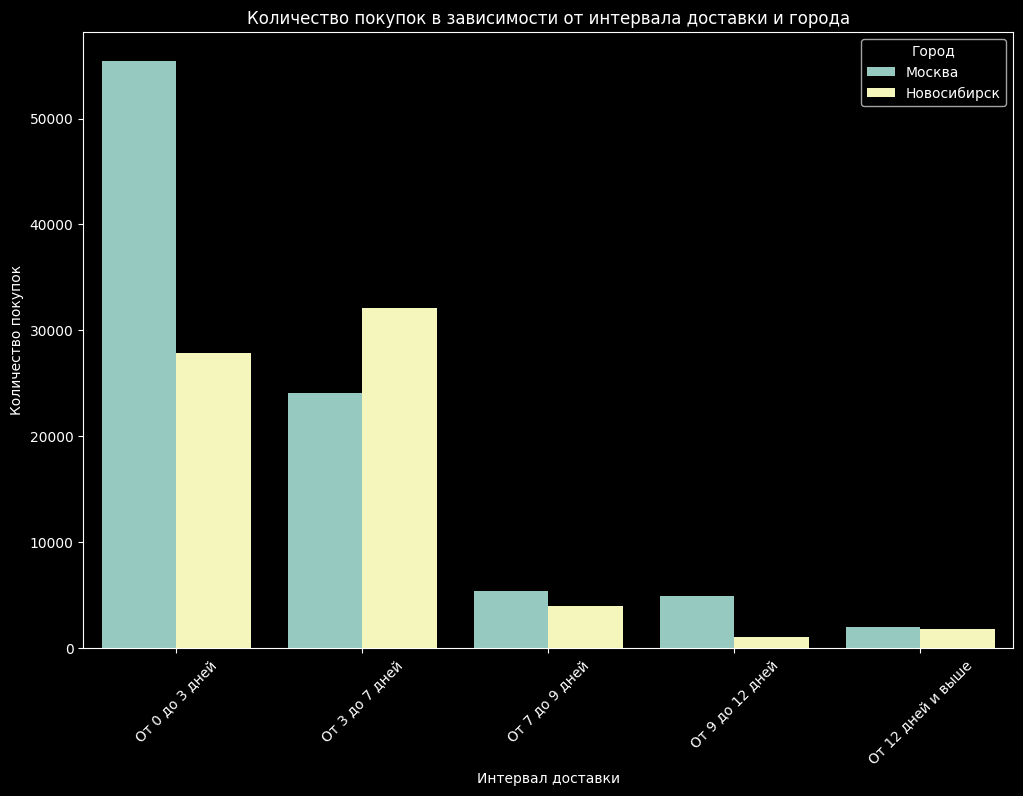

In [65]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Дни доставки интервалы', y='count', hue='Город', data=t)
plt.title('Количество покупок в зависимости от интервала доставки и города')
plt.xlabel('Интервал доставки')
plt.ylabel('Количество покупок')
plt.xticks(rotation=45)
plt.show()

In [66]:
df.head()

,Название из источника,Количество из источника,Стоимость из источника,Заплачено,Магазин,Город,Код детали,Описание,Производитель,Инфо о доставке,Деталь оригинальная,Цена магазина,Цена за то же количество в магазине,Всего заплачено,Возможное снижение %,Возможная экономия,Дни доставки,Дни доставки интервалы,Классификация
1,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильтр масляный,TOYOTA,2 дн,1,1280,1280,100,-1180.0,1180,2.0,От 0 до 3 дней,Фильтр
2,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильтp масляный,TOYOTA,5 дн,1,1285,1285,100,-1185.0,1185,5.0,От 3 до 7 дней,Фильтр
4,0415238010,1,100,100,autoto.ru,Москва,0415238010,"ELEMENT KIT, OIL FILTER",TOYOTA,11 дн,1,1305,1305,100,-1205.0,1205,11.0,От 9 до 12 дней,Фильтр
5,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильт масляный,TOYOTA,10 дн,1,1305,1305,100,-1205.0,1205,10.0,От 9 до 12 дней,Фильтр
6,0415238010,1,100,100,autoto.ru,Москва,0415238010,Фильт масляный,TOYOTA,10 дн,1,1305,1305,100,-1205.0,1205,10.0,От 9 до 12 дней,Фильтр


## Ранкинг производителей

In [67]:
t = f_df.groupby(['Производитель'], observed=True)['Классификация'].agg(['count'])
t.columns = [''.join(col).strip() for col in t.columns.values]


t = t.reset_index().sort_values(by='count', ascending=False)
t.head(10)

,Производитель,count
316,FORD,7325
727,PATRON,4645
924,VAG,3968
858,STELLOX,3514
618,MILES,3093
561,LYNXAUTO,2962
740,PILENGA,2530
294,FEBEST,2273
907,TRW,2205
825,SAT,2079


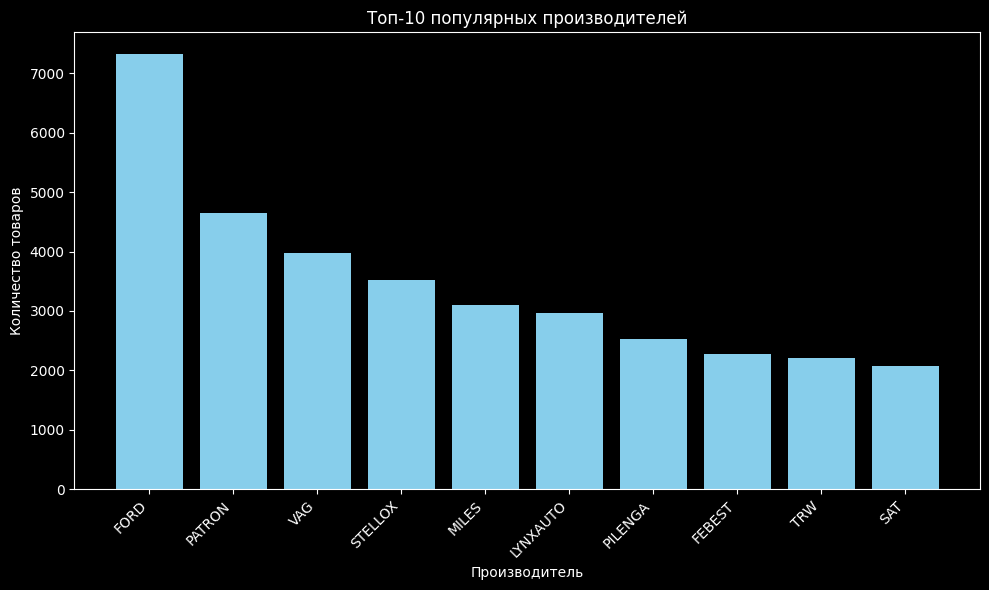

In [68]:
top_10 = t.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10['Производитель'], top_10['count'], color='skyblue')
plt.xlabel('Производитель')
plt.ylabel('Количество товаров')
plt.title('Топ-10 популярных производителей')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Можно заметить, что наиболее популярным Производителям в магазинах является Ford. Можно предположить, что детали данного производителя имеют наибольший спрос среди потребителя.

# Исходя из предоставленных данных и анализа можно сделать следующие выводы:

Магазины: "autoto.ru" имеет большое разнообразие товаров и более широкий спектр сроков доставки, в то время как магазин "exist.ru" ориентирован на более ограниченный набор товаров.

Ранг категорий: Фильтры являются наиболее популярными категориями в обоих магазинах, однако далее идут различия связанные с предпочтениями покупателей, либо с популярностью товаров в точках.

Средняя цена: Средняя цена товаров в магазине "exist.ru" выше по сравнению с магазином "autoto.ru", что может свидетельствовать о более высоком качестве или уникальности предлагаемых товаров.

Сроки доставки: Большинство заказов в Москве доставляются в течение 0-3 дней, в то время как в Новосибирске этот период составляет от 0 до 7 дней. Это может подразумевать, что логистика в Новосибирске менее эффективна из-за его удаленного географического расположения по сравнению с Москвой.

Сравнение магазинов: Москва и Новосибирск - наиболее активные регионы для обоих магазинов. Однако средняя цена в Москве ниже, что может быть связано с более доступной логистикой в сравнении с другим городом.


